In [1]:
import pandas as pd

In [3]:
df_fields = pd.read_csv('../data/fields.csv', delimiter=';', decimal=',', skiprows=[0, 2])
df_value = pd.read_csv('../data/value.csv', delimiter=';', decimal=',', skiprows=[0, 1], parse_dates=['inv_item_date'], date_format={'inv_item_date': '%d.%m.%Y'})
df_works = pd.read_csv('../data/works.csv', delimiter=';', decimal=',', skiprows=[0, 1], parse_dates=['start_date', 'end_date'], date_format={'start_date': '%d.%m.%Y', 'end_date': '%d.%m.%Y'})

df_works['area'] = df_works['area'].str.replace(',', '.').astype(float)

In [4]:
df_works['work_type'].unique()

array(['Обработка почвы', 'Внесение СЗР', 'Внесение удобрений', 'Сев',
       'Уборка'], dtype=object)

In [5]:
df_works['work_subtype'].unique()

array(['Боронование', 'Дискование', 'Вспашка', 'Обработка СЗР',
       'Культивация', 'Внесение СЗР и удобрений', 'Прикатывание',
       'Внесение органических удобрений',
       'Внесение жидких органических удобрений',
       'Внесение минеральных удобрений', 'Сев с внесением удобрений',
       'Глубокорыхление', 'Сев без внесения удобрений', 'Мульчирование',
       'Уборка трав', 'Дератизация', 'Прессование', 'Уборка камней',
       'Сгребание в валки', 'Вывоз', 'Кошение', 'Подбор (корм)',
       'Междурядная обработка без внесения', 'Ворошение',
       'Уборка силос/карнаж', 'Подбор', 'Заготовка сенажа',
       'Подбор и обмолот', 'Прямое комбайнирование',
       'Вывоз (тех.культуры)', 'Копка'], dtype=object)

In [6]:
df_works.head(1)

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,Unnamed: 13,Unnamed: 14,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id
0,2023,16.13.12.044.00,Обработка почвы,Боронование,2022-04-29,2022-04-30,49.78,"Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10


In [7]:
df_works_tmp = df_works.query("work_type in ['Внесение СЗР', 'Внесение удобрений']")[['work_id', 'season', 'field', 'work_type']]

df_works_tmp.head(10)

,work_id,season,field,work_type
15,D6C06921-9C0A-4C67-9EA2-56125F0E2F2B,2023,16.13.12.017.00,Внесение СЗР
63,A6744CF5-4AE9-42B6-848B-ED9BB080B8B0,2023,16.13.12.059.00,Внесение СЗР
64,9F552625-E91C-4B3F-ABB4-5E565D4A7687,2023,16.13.12.066.00,Внесение СЗР
65,EB59990D-0C80-4894-9EE6-03FC89F4A8C5,2023,16.13.12.068.00,Внесение СЗР
66,AB7177FA-F620-48E4-856F-D1424F119416,2023,16.13.12.069.00,Внесение СЗР
67,B2D148E8-FA5E-40A4-8835-07B276980913,2023,16.13.12.071.00,Внесение СЗР
87,151E2624-52C1-4BFB-A57E-FC467F31D6AD,2023,16.13.12.066.00,Внесение СЗР
88,D906EFC3-B65F-49CA-A440-59E654248FD1,2023,16.13.12.067.00,Внесение СЗР
89,60F20A24-2EC7-45D0-914D-1FA4F173BCFE,2023,16.13.12.068.00,Внесение СЗР
90,B6698AB7-3ECD-4466-8965-72CAECD91ACD,2023,16.13.19.033.00,Внесение СЗР


In [8]:
df_value_tmp = df_value[df_value['inv_item_type'] == 'Удобрения']

df_value_tmp.head()

,field,inv_item_type,inv_item_name,inv_item_weight,inv_item_unit,inv_item_dose,inv_item_date,work_id
0,36.01.21.025.01,Удобрения,Удобрение 31,15017.6,кг,260.0,2024-10-28,E3A7DAEB-D124-4685-ADE1-199818C77361
1,36.14.12.064.00,Удобрения,Удобрение 31,6500.0,м3,65.0,2024-10-28,0AB8C8D7-04BD-4483-98B2-3E062CDD7E3E
2,36.14.16.008.00,Удобрения,Удобрение 49,7865.0,т,65.0,2024-10-28,00E51F81-0A4F-4983-B068-877A089FFD33
3,36.14.16.008.00,Удобрения,Удобрение 49,10985.0,т,65.0,2024-10-28,150F0150-8061-4CE9-9570-B112CBAD7C51
4,36.14.16.008.00,Удобрения,Удобрение 49,10985.0,т,65.0,2024-10-28,D5D1EADB-D159-4CF8-8C2A-171517ACD403


In [9]:
df_tmp = df_works_tmp.merge(df_value_tmp, how='left', on=['field', 'work_id']).dropna().drop('work_id', axis=1)

df_tmp.head()

,season,field,work_type,inv_item_type,inv_item_name,inv_item_weight,inv_item_unit,inv_item_dose,inv_item_date
1,2023,16.13.12.059.00,Внесение СЗР,Удобрения,Удобрение 38,4744.34,кг,0.39,2022-06-23
2,2023,16.13.12.066.00,Внесение СЗР,Удобрения,Удобрение 38,3159.00,кг,0.39,2022-06-23
3,2023,16.13.12.068.00,Внесение СЗР,Удобрения,Удобрение 38,2951.91,кг,0.39,2022-06-23
4,2023,16.13.12.069.00,Внесение СЗР,Удобрения,Удобрение 38,711.08,кг,0.39,2022-06-23
5,2023,16.13.12.071.00,Внесение СЗР,Удобрения,Удобрение 38,503.38,кг,0.39,2022-06-23


In [10]:
df_yield_fact = df_works[df_works['work_type'] == 'Уборка'][['season', 'field', 'yield_fact']]
df_yield_fact = df_yield_fact.groupby(by=['field', 'season'], group_keys=True).mean().reset_index()

df_yield_fact.head()

,field,season,yield_fact
0,02.09.02.002.01,2023,1.567500
1,02.09.02.002.01,2024,0.000000
2,02.09.02.010.00,2024,0.000000
3,02.09.02.015.00,2023,1.228750
4,02.09.02.019.00,2023,0.716667


In [11]:
df_fertilizers = df_tmp.merge(df_yield_fact, how='left', on=['field', 'season']).drop(['work_type', 'inv_item_type'], axis=1)
df_fertilizers = df_fertilizers.sort_values(by=['field', 'season'])
df_fertilizers.head()

,season,field,inv_item_name,inv_item_weight,inv_item_unit,inv_item_dose,inv_item_date,yield_fact
3253,2023,02.09.02.002.01,Удобрение 57,1879808.13,кг,130.0,2023-04-25,1.56750
16239,2024,02.09.02.003.00,Удобрение 12,1095063.89,кг,130.0,2024-05-02,NaN
16240,2024,02.09.02.013.00,Удобрение 12,81640.47,кг,130.0,2024-05-02,NaN
3254,2023,02.09.02.015.00,Удобрение 57,171677.43,кг,130.0,2023-04-25,1.22875
19032,2024,02.09.02.015.00,Удобрение 23,1716.77,л,1.3,2024-06-20,NaN


In [12]:
df_fertilizers.shape

(20387, 8)

In [13]:
df_fertilizers.isna().sum()

season                0
field                 0
inv_item_name         0
inv_item_weight       0
inv_item_unit         0
inv_item_dose         0
inv_item_date         0
yield_fact         2933
dtype: int64

In [14]:
df_fertilizers.to_csv('fertilizers.csv')

### Влияние предшественника и содержания питательных веществ в почве на урожайность

- Исследовательский вопрос: Как предшествующая культура и содержание фосфора, калия, гумуса и кислотности почвы влияют на фактическую урожайность?
- Гипотеза: Урожайность возрастает при оптимальных значениях питательных веществ и правильном выборе предшественника.

In [15]:
df_fields_tmp = df_fields[['season', 'field', 'p2o5', 'k2o', 'humus', 'ph', 'crop_predecessor']]
df_fields_tmp.head()

,season,field,p2o5,k2o,humus,ph,crop_predecessor
0,2023,22.47.01.001.01,221.05,206.3,4.05,5.25,Пар; Яр.пшеница мягкая
1,2023,22.47.01.001.02,221.05,206.3,4.05,5.25,Пар; Яр.пшеница мягкая
2,2023,22.47.01.002.00,199.80,186.0,3.50,5.20,Яр.пшеница мягкая
3,2023,22.47.01.003.00,186.50,174.8,5.90,5.40,Пар
4,2023,22.47.01.004.00,166.60,147.9,5.60,5.40,Пар


In [16]:
df_works[['season', 'field', 'yield_fact', 'work_type']].sort_values(by='yield_fact', ascending=False).head()

,season,field,yield_fact,work_type
67108,2023,36.01.21.050.00,415745.40,Уборка
163743,2024,36.05.07.030.01,110213.04,Уборка
87873,2023,36.02.11.044.00,86299.19,Уборка
165112,2024,36.05.07.057.03,78114.35,Уборка
163744,2024,36.05.07.030.01,29971.11,Уборка


In [17]:
df_yield_fact = df_works[df_works['work_type'] == 'Уборка'][['season', 'field', 'yield_fact']]
df_yield_fact = df_yield_fact.groupby(by=['field', 'season'], group_keys=True).mean().reset_index().sort_values(by='yield_fact', ascending=False)

df_yield_fact.head()

,field,season,yield_fact
2221,36.05.07.057.03,2024,78114.3500
1193,36.01.21.050.00,2023,51971.8150
2168,36.05.07.030.01,2024,31440.0240
1669,36.02.11.044.00,2023,28021.2425
2225,36.05.07.059.02,2024,24661.8150


In [18]:
df = df_fields_tmp.merge(df_yield_fact, how='left', on=['field', 'season'])
df['crop_predecessor_split'] = df['crop_predecessor'].str.split(';')
df = df.dropna()

df.head()

,season,field,p2o5,k2o,humus,ph,crop_predecessor,yield_fact,crop_predecessor_split
0,2023,22.47.01.001.01,221.05,206.3,4.05,5.25,Пар; Яр.пшеница мягкая,194.510000,"[Пар, Яр.пшеница мягкая]"
3,2023,22.47.01.003.00,186.50,174.8,5.90,5.40,Пар,2.152083,[Пар]
4,2023,22.47.01.004.00,166.60,147.9,5.60,5.40,Пар,1.564815,[Пар]
7,2023,22.47.01.006.02,194.70,195.9,4.00,5.15,Пар,2.098889,[Пар]
9,2023,22.47.01.007.02,184.20,171.4,4.40,5.05,Пар,2.251429,[Пар]


<Axes: xlabel='ph', ylabel='yield_fact'>

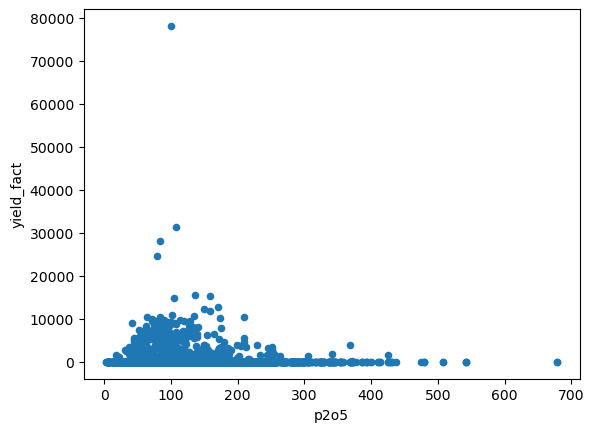

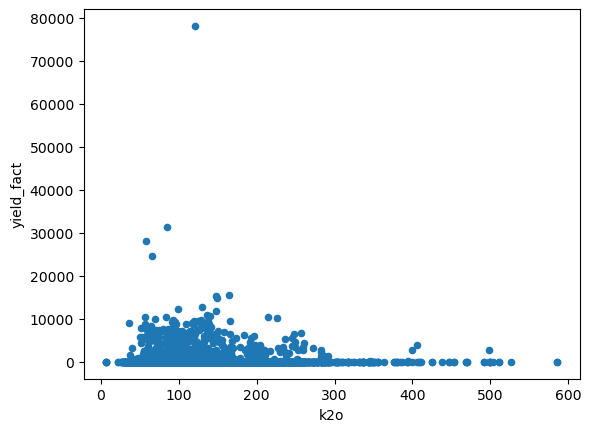

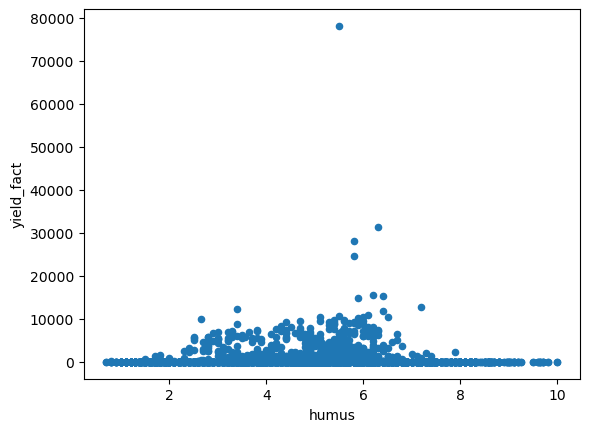

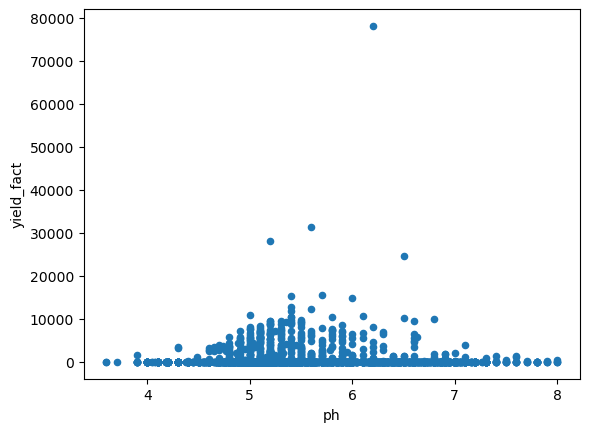

In [19]:
df[['p2o5', 'yield_fact']].plot(kind='scatter', x='p2o5', y='yield_fact')
df[['k2o', 'yield_fact']].plot(kind='scatter', x='k2o', y='yield_fact')
df[['humus', 'yield_fact']].plot(kind='scatter', x='humus', y='yield_fact')
df[['ph', 'yield_fact']].plot(kind='scatter', x='ph', y='yield_fact')

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer

In [40]:
X = df.drop(columns=['season', 'field', 'yield_fact', 'crop_predecessor', 'crop_predecessor_split'])
y = df['yield_fact']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [43]:
X_train

,p2o5,k2o,humus,ph
14895,5.83,166.10,7.30,5.28
3287,261.80,279.22,4.89,5.88
8064,7.65,26.40,20.61,7.70
8964,6.93,118.80,29.93,2.09
1607,234.30,68.20,1.65,6.16
...,...,...,...,...
9586,6.38,194.70,50.28,1.65
8289,7.48,122.10,74.83,6.82
8505,6.95,27.87,65.21,7.11
1611,100.10,95.70,1.65,5.72


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [45]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R2 train: {r2_train}")
print(f"MAE train: {mae_train}")
print(f"RMSE train: {rmse_train}")

print(f"R2 test: {r2_test}")
print(f"MAE test: {mae_test}")
print(f"RMSE test: {rmse_test}")


R2 train: 0.0023081950248331484
MAE train: 361.8563072650049
RMSE train: 1353.1581509344883
R2 test: 0.0038131614685004145
MAE test: 356.9907988311102
RMSE test: 1328.801353919061


In [46]:
from catboost import CatBoostRegressor

In [47]:
catboost_params = {
    'iterations': 2000,
    'learning_rate': 0.005,
    'eval_metric': 'RMSE',
    'depth': 10,
    'verbose': 100,
    'random_seed': 42,
}

In [48]:
model = CatBoostRegressor(**catboost_params)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R2 train: {r2_train}")
print(f"MAE train: {mae_train}")
print(f"RMSE train: {rmse_train}")

print(f"R2 test: {r2_test}")
print(f"MAE test: {mae_test}")
print(f"RMSE test: {rmse_test}")

0:	learn: 1354.3088660	total: 54.8ms	remaining: 1m 49s
100:	learn: 1326.0751034	total: 1.93s	remaining: 36.2s
200:	learn: 1303.2237163	total: 4.31s	remaining: 38.6s
300:	learn: 1286.9714671	total: 6.45s	remaining: 36.4s
400:	learn: 1273.6310235	total: 8.58s	remaining: 34.2s
500:	learn: 1261.5368614	total: 10.5s	remaining: 31.4s
600:	learn: 1249.8188316	total: 12.4s	remaining: 28.9s
700:	learn: 1239.4707425	total: 14.6s	remaining: 27.1s
800:	learn: 1230.3361527	total: 16.7s	remaining: 25.1s
900:	learn: 1222.0149593	total: 19s	remaining: 23.2s
1000:	learn: 1214.1183473	total: 21s	remaining: 21s
1100:	learn: 1207.1549166	total: 23.5s	remaining: 19.1s
1200:	learn: 1200.0437196	total: 25.4s	remaining: 16.9s
1300:	learn: 1193.8225082	total: 27.3s	remaining: 14.7s
1400:	learn: 1187.5457150	total: 29.2s	remaining: 12.5s
1500:	learn: 1181.4671014	total: 31.1s	remaining: 10.3s
1600:	learn: 1175.4160908	total: 32.9s	remaining: 8.19s
1700:	learn: 1169.1720103	total: 34.8s	remaining: 6.11s
1800:	le

In [49]:
df['crop_predecessor_split'].dtypes
mlb = MultiLabelBinarizer()
one_hot = mlb.fit_transform(df['crop_predecessor_split'])

one_hot_df = pd.DataFrame(one_hot, columns=mlb.classes_, index=df.index)

df = pd.concat([df, one_hot_df], axis=1)

df.head()

,season,field,p2o5,k2o,humus,ph,crop_predecessor,yield_fact,crop_predecessor_split,Горох,...,Эспарцет 1 г.ж.сем.,Эспарцет пр.лет корм,Эспарцет пр.лет сем.,Яр.пшеница мягк.с подс.(кл.кр.+тим.корм),Яр.пшеница мягк.с подс.(кл.кр.сем.),Яр.пшеница мягкая,Яр.пшеница твёрдая,Яр.рапс,Яр.ячмень,Яр.ячмень с подс.(мн.травосм.корм)
0,2023,22.47.01.001.01,243.16,226.93,4.46,5.78,Пар; Яр.пшеница мягкая,194.510000,"[Пар, Яр.пшеница мягкая]",0,...,0,0,0,0,0,0,0,0,0,0
3,2023,22.47.01.003.00,205.15,192.28,6.49,5.94,Пар,2.152083,[Пар],0,...,0,0,0,0,0,0,0,0,0,0
4,2023,22.47.01.004.00,183.26,162.69,6.16,5.94,Пар,1.564815,[Пар],0,...,0,0,0,0,0,0,0,0,0,0
7,2023,22.47.01.006.02,214.17,215.49,4.40,5.67,Пар,2.098889,[Пар],0,...,0,0,0,0,0,0,0,0,0,0
9,2023,22.47.01.007.02,202.62,188.54,4.84,5.56,Пар,2.251429,[Пар],0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(columns=['season', 'field', 'yield_fact', 'crop_predecessor', 'crop_predecessor_split'])
y = df['yield_fact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R2 train: {r2_train}")
print(f"MAE train: {mae_train}")
print(f"RMSE train: {rmse_train}")

print(f"R2 test: {r2_test}")
print(f"MAE test: {mae_test}")
print(f"RMSE test: {rmse_test}")

R2 train: 0.04291932737678761
MAE train: 349.65525667669465
RMSE train: 1325.33183039274
R2 test: -374991106675463.2
MAE test: 1184021844.3502285
RMSE test: 25781022992.32711


In [52]:
model = CatBoostRegressor(**catboost_params)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R2 train: {r2_train}")
print(f"MAE train: {mae_train}")
print(f"RMSE train: {rmse_train}")

print(f"R2 test: {r2_test}")
print(f"MAE test: {mae_test}")
print(f"RMSE test: {rmse_test}")

0:	learn: 1354.1193447	total: 26.5ms	remaining: 53s
100:	learn: 1303.9835981	total: 2.41s	remaining: 45.3s
200:	learn: 1269.9068154	total: 4.76s	remaining: 42.6s
300:	learn: 1244.4789533	total: 7.23s	remaining: 40.8s
400:	learn: 1225.3478168	total: 10.9s	remaining: 43.6s
500:	learn: 1207.3839075	total: 13.5s	remaining: 40.5s
600:	learn: 1192.7045173	total: 16.2s	remaining: 37.7s
700:	learn: 1177.4210195	total: 19.1s	remaining: 35.4s
800:	learn: 1165.5010915	total: 21.6s	remaining: 32.4s
900:	learn: 1154.8944335	total: 24.3s	remaining: 29.6s
1000:	learn: 1145.6380744	total: 27.2s	remaining: 27.1s
1100:	learn: 1137.1990307	total: 29.4s	remaining: 24s
1200:	learn: 1127.5729850	total: 31.7s	remaining: 21.1s
1300:	learn: 1120.4187694	total: 34s	remaining: 18.3s
1400:	learn: 1113.1201053	total: 36.3s	remaining: 15.5s
1500:	learn: 1106.1114318	total: 38.8s	remaining: 12.9s
1600:	learn: 1099.5184493	total: 41.1s	remaining: 10.2s
1700:	learn: 1094.2121658	total: 43.3s	remaining: 7.62s
1800:	lea

### df fertilizers